In [8]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-muted')
sns.set_palette("Set2")


In [9]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()  # Upload "Netflix Dataset.csv"

df = pd.read_csv("Netflix Dataset.csv")

Saving Netflix Dataset.csv to Netflix Dataset (1).csv


In [10]:
# Step 3: Overview
print("✅ Dataset Loaded Successfully!\n")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

✅ Dataset Loaded Successfully!

Shape: (7789, 11)

Columns:
 Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [12]:
# Step 4: Basic Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['Type', 'Title'], inplace=True)
df['date_added'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

print("\n✅ Data Cleaning Done!\n")
print(df.info())


✅ Data Cleaning Done!

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7280 non-null   object        
 6   Release_Date  7777 non-null   object        
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
 11  date_added    7689 non-null   datetime64[ns]
 12  year_added    7689 non-null   float64       
 13  month_added   7689 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 912.5+ KB


In [14]:
# Step 5: Basic Insights
print("\nUnique Content Types:", df['Type'].unique())
print("Total Movies:", len(df[df['Type']=='Movie']))
print("Total TV Shows:", len(df[df['Type']=='TV Show']))


Unique Content Types: ['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Romantic Movi

/tmp/ipython-input-4139289391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='coolwarm')


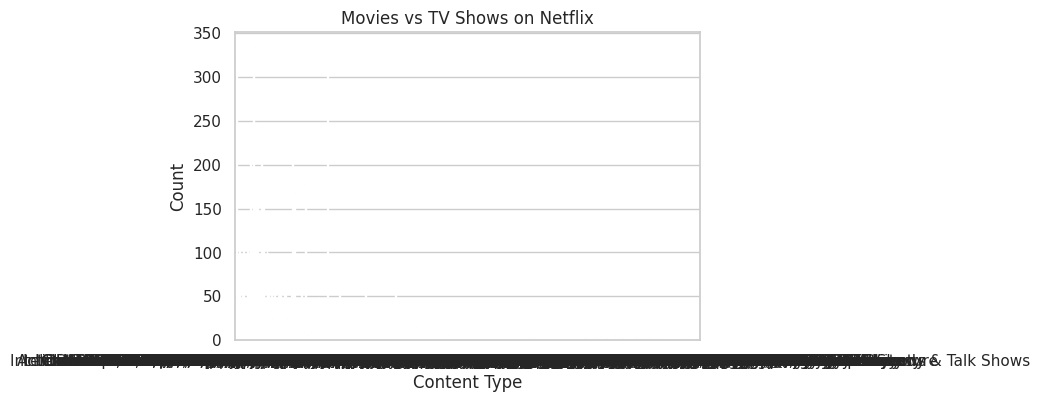

In [16]:
# Step 6: Distribution - Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type', palette='coolwarm')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

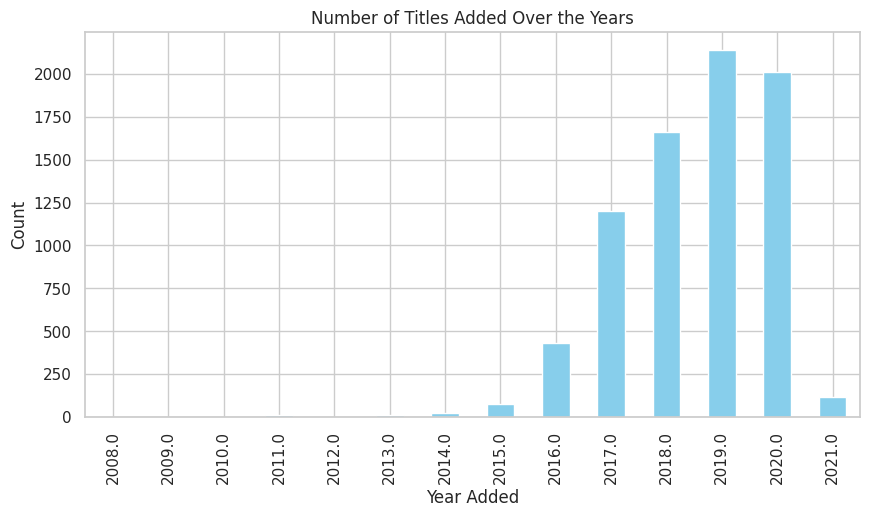

In [17]:
# Step 7: Content Addition Over the Years
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1751595120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


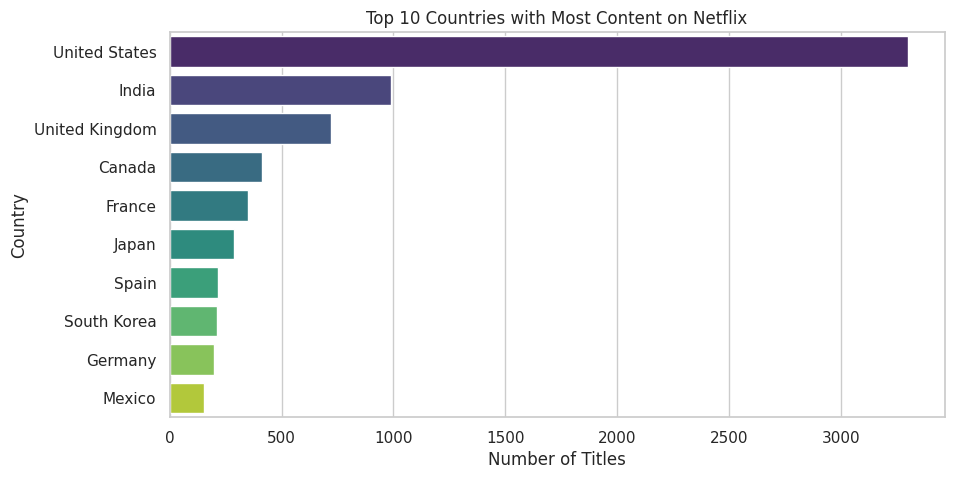

In [19]:
# Step 8: Top 10 Countries by Content
top_countries = df['Country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-881234187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')


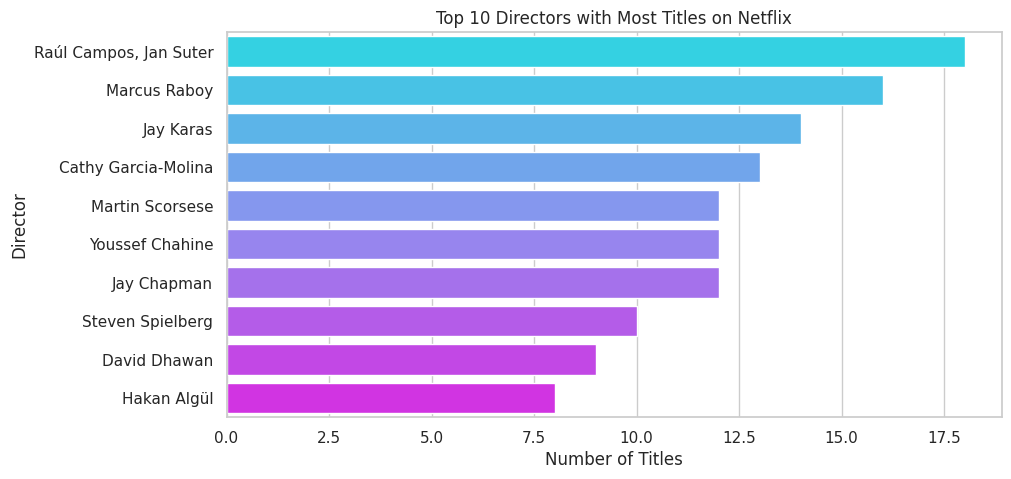

In [21]:
# Step 9: Top 10 Directors with Most Titles
top_directors = df['Director'].dropna().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

/tmp/ipython-input-3067350256.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='magma')


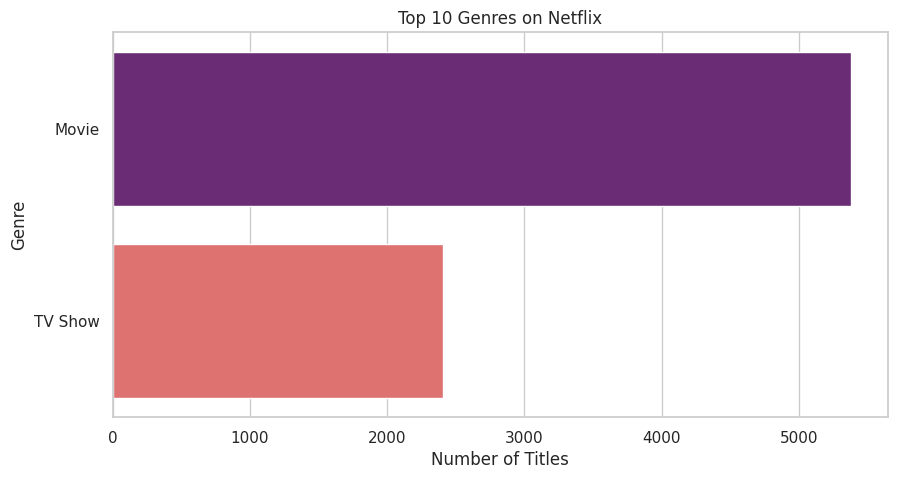

In [23]:
# Step 10: Top Genres (listed_in column)
from collections import Counter
genre_list = df['Category'].dropna().str.split(', ')
genres = Counter([genre for sublist in genre_list for genre in sublist])
top_genres = pd.DataFrame(genres.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

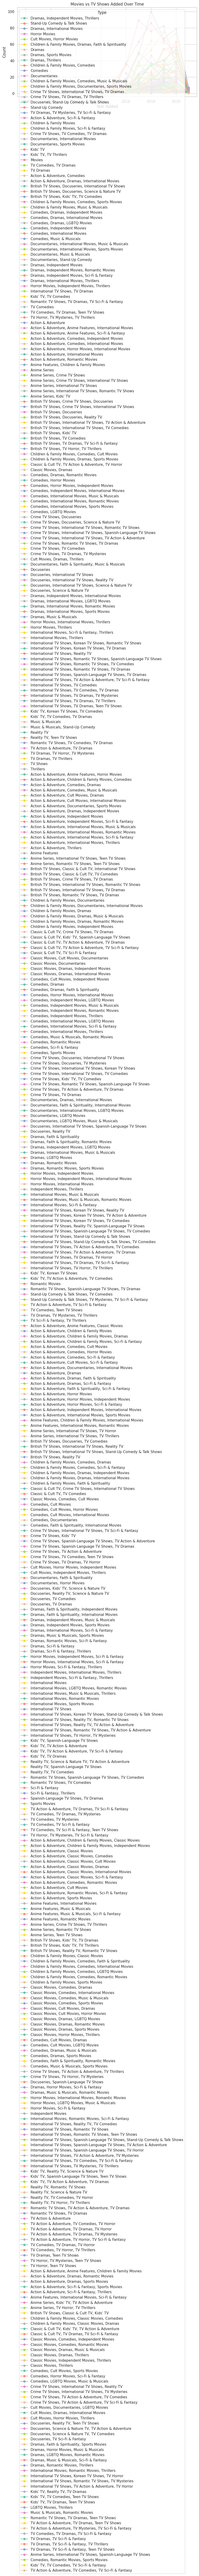

In [25]:
# Step 11: Trend of Movies vs TV Shows Over Time
content_trend = df.groupby(['year_added', 'Type']).size().unstack()
content_trend.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Movies vs TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2919313908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='cubehelix')


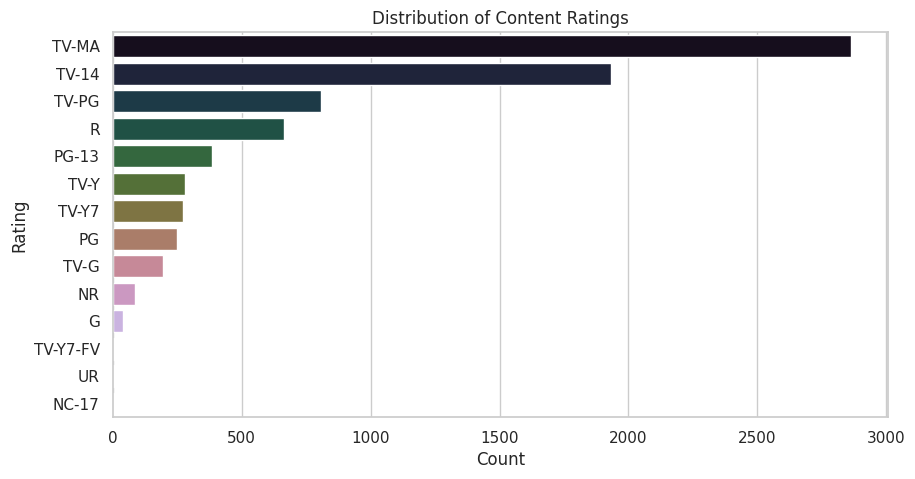

In [27]:
# Step 12: Ratings Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

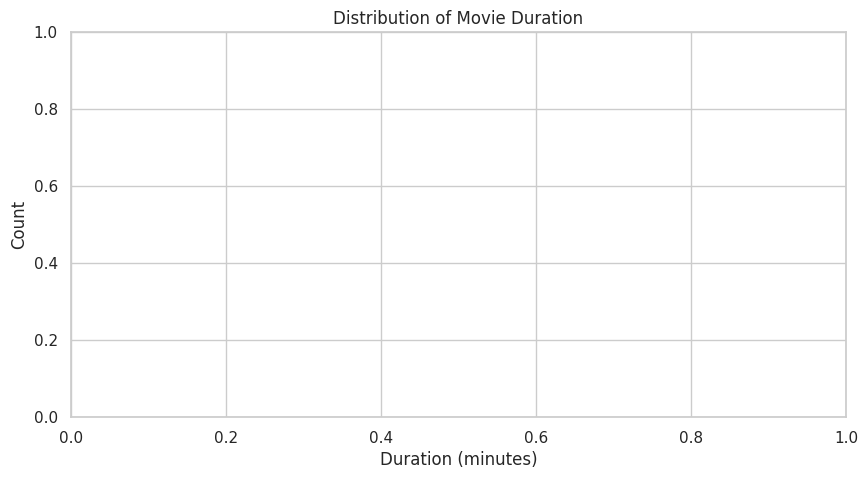

In [29]:
# Step 13: Duration Analysis (Movies Only)
df_movies = df[df['Type'] == 'Movie']
plt.figure(figsize=(10,5))
sns.histplot(df_movies['Duration'].str.replace(' min', '').astype(float), bins=20, color='coral')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [30]:
# Step 14: Key Insights
print("📈 Key Insights:")
print("""
1️⃣ Netflix has more Movies than TV Shows overall.
2️⃣ Most content was added between 2018–2020.
3️⃣ The United States, India, and the UK contribute the most titles.
4️⃣ Popular genres include International Movies, Dramas, and Comedies.
5️⃣ The trend shows a consistent rise in TV Shows in recent years, balancing the movie dominance.
""")

📈 Key Insights:

1️⃣ Netflix has more Movies than TV Shows overall.
2️⃣ Most content was added between 2018–2020.
3️⃣ The United States, India, and the UK contribute the most titles.
4️⃣ Popular genres include International Movies, Dramas, and Comedies.
5️⃣ The trend shows a consistent rise in TV Shows in recent years, balancing the movie dominance.



In [31]:
# Step 15: Save Cleaned Data (optional)
df.to_csv("Netflix_Cleaned.csv", index=False)
print("✅ Cleaned data saved as 'Netflix_Cleaned.csv'")

✅ Cleaned data saved as 'Netflix_Cleaned.csv'
